In [1]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu126

Looking in indexes: https://download.pytorch.org/whl/cu126


In [2]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [3]:
!cd yolov5 & pip install -r requirements.txt

In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np 
import cv2

In [2]:
import os 
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [3]:
model= torch.hub.load('ultralytics/yolov5','yolov5s')

Using cache found in C:\Users\User/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2025-3-3 Python-3.12.4 torch-2.6.0+cu126 CUDA:0 (NVIDIA GeForce RTX 4050 Laptop GPU, 6140MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [4]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [5]:
img= 'https://ichef.bbci.co.uk/ace/ws/640/cpsprodpb/128F1/production/_101971067_gettyimages-933565210.jpg.webp'

In [6]:
result = model(img)
result.print()

C:\Users\User/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 360x640 6 persons, 1 sports ball
Speed: 1668.6ms pre-process, 264.0ms inference, 552.0ms NMS per image at shape (1, 3, 384, 640)


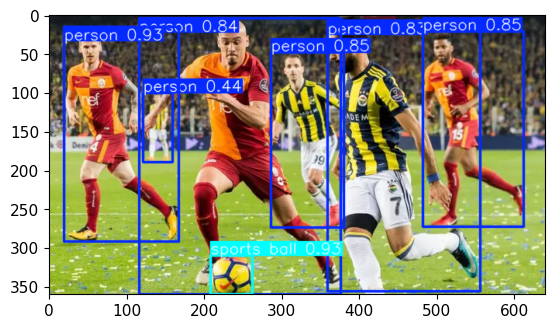

In [7]:
%matplotlib inline 
plt.imshow(np.squeeze(result.render()))
plt.show()
#render ettik burda imgyi

In [8]:
result.xyxy

[tensor([[1.93511e+01, 1.68065e+01, 1.67954e+02, 2.92936e+02, 9.33277e-01, 0.00000e+00],
         [2.08415e+02, 3.10516e+02, 2.62584e+02, 3.60000e+02, 9.25799e-01, 3.20000e+01],
         [4.82719e+02, 2.23269e+01, 6.12823e+02, 2.73499e+02, 8.50576e-01, 0.00000e+00],
         [2.86365e+02, 4.95234e+01, 3.80577e+02, 2.74075e+02, 8.49496e-01, 0.00000e+00],
         [1.16806e+02, 5.99698e+00, 3.76655e+02, 3.60000e+02, 8.37852e-01, 0.00000e+00],
         [3.59663e+02, 8.32889e+00, 5.56017e+02, 3.56886e+02, 8.28315e-01, 0.00000e+00],
         [1.21475e+02, 1.01674e+02, 1.59572e+02, 1.90600e+02, 4.41301e-01, 0.00000e+00]], device='cuda:0')]

REAL TİME

In [10]:
cap= cv2.VideoCapture(0) #opencv içinde video yakalamk için kamerayı açar 0 pcnin kendi kamerasıdır
while cap.isOpened(): #burda kamera açıkmı diye kontrol ediliyor cap nesnesi ile
    ret,frame = cap.read() #ret -true yada false döner- false dönerse kamera kapalı demektir, frame camden gelen veri tutar

    #Tespit yapmak için
    result= model(frame)

    cv2.imshow('YORGUNLUK TESPIT', np.squeeze(result.render()))#opencv kullanrak pencere açar ve kamerayı gösterir

    if cv2.waitKey(10) & 0xFF == ord('q'):#wait key ile 10ms klavyeden hareket beklenir ve q basılırsa işlmei bitirir
        break
cap.release()#kamerayı kapatır
cv2.destroyAllWindows()#açık olan opencv pencerelerini kapatır

C:\Users\User/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\User/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\User/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\User/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\User/.cache\torch\hub\ultralytics_yolov5_master\models\comm